<a href="https://colab.research.google.com/github/MenakoD/TestStat_Python/blob/main/MasterClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Package pour l'importation des données
import pandas as pd


In [2]:
# Importer la base de données
df = pd.read_csv("/content/sample_data/Base_Churn.csv", sep=";", decimal=",")
df.head()

,ID,Call__Failure,Plaintes,Subscription__Length,Charge__Amount,Secondes_Utilisation,Frequence_Utilisation,Frequence_SMS,Numeros_Appeles_Distincts,Groupe_Age,Plan_Tarifaire,Statut,Age,Valeur_Client,Churn
0,1,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,2,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,3,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,4,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,5,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [3]:
# Analyser des 1eres lignes de la base
df.head()

,ID,Call__Failure,Plaintes,Subscription__Length,Charge__Amount,Secondes_Utilisation,Frequence_Utilisation,Frequence_SMS,Numeros_Appeles_Distincts,Groupe_Age,Plan_Tarifaire,Statut,Age,Valeur_Client,Churn
0,1,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,2,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,3,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,4,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,5,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [4]:
# Types de données
# Valeur_client était Object, changé en Float en ajoutant decimal="," à l'importation de la base des données
df.dtypes

ID                             int64
Call__Failure                  int64
Plaintes                       int64
Subscription__Length           int64
Charge__Amount                 int64
Secondes_Utilisation           int64
Frequence_Utilisation          int64
Frequence_SMS                  int64
Numeros_Appeles_Distincts      int64
Groupe_Age                     int64
Plan_Tarifaire                 int64
Statut                         int64
Age                            int64
Valeur_Client                float64
Churn                          int64
dtype: object

In [5]:
# Avant l'analyse des données transformer les données churn (variable qui dit si le client va partir à la concurrence)
# et transformer les var quali (plaintes, Groupe d'age, statut, Plan tarifaire) de int en chaine de caract (Object)avec
# la fonction astype de python
df['Churn'] = df['Churn'].astype("object")
df.dtypes

ID                             int64
Call__Failure                  int64
Plaintes                       int64
Subscription__Length           int64
Charge__Amount                 int64
Secondes_Utilisation           int64
Frequence_Utilisation          int64
Frequence_SMS                  int64
Numeros_Appeles_Distincts      int64
Groupe_Age                     int64
Plan_Tarifaire                 int64
Statut                         int64
Age                            int64
Valeur_Client                float64
Churn                         object
dtype: object

In [6]:
# Transformer tranche d'age
df['Groupe_Age'] = df['Groupe_Age'].astype("object")

# Transformer plainte
df['Plaintes'] = df['Plaintes'].astype("object")

# Transformer Statut
df['Statut'] = df['Statut'].astype("object")

# Transformer Plan_Tarifaire
df['Plan_Tarifaire'] = df['Plan_Tarifaire'].astype("object")

df.dtypes

ID                             int64
Call__Failure                  int64
Plaintes                      object
Subscription__Length           int64
Charge__Amount                 int64
Secondes_Utilisation           int64
Frequence_Utilisation          int64
Frequence_SMS                  int64
Numeros_Appeles_Distincts      int64
Groupe_Age                    object
Plan_Tarifaire                object
Statut                        object
Age                            int64
Valeur_Client                float64
Churn                         object
dtype: object


# Question 1
# Y a-t-il un lien entre la frequence des SMS des clients et la valeur des clients (chiffre affaire)?

Cette question introduit l'analyse de CORRELATION entre 2 var quanti




I - ANALYSE DE LA *CORRELATION* ENTRE 2 VARIABLES QUANTITATIVES

## Etape 1: NUAGE DE POINTS (Scatterplot)

Text(0, 0.5, 'Valeur Client')

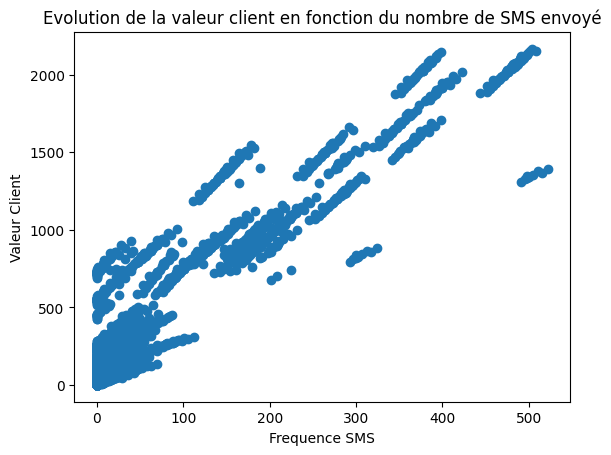

In [7]:
# Etape 1: NUAGE DE POINTS (Scatterplot) entre les 2 variables

# Graphiqe avec Matplotlib (y a lafonction scatterplot dans Matplotlib)
import matplotlib.pyplot as plt
plt.scatter(df['Frequence_SMS'], df['Valeur_Client'])

# Personaliser le graphique après execution de plt.scatter
plt.title("Evolution de la valeur client en fonction du nombre de SMS envoyé")
plt.xlabel("Frequence SMS")
plt.ylabel("Valeur Client")


<Axes: xlabel='Frequence_SMS', ylabel='Valeur_Client'>

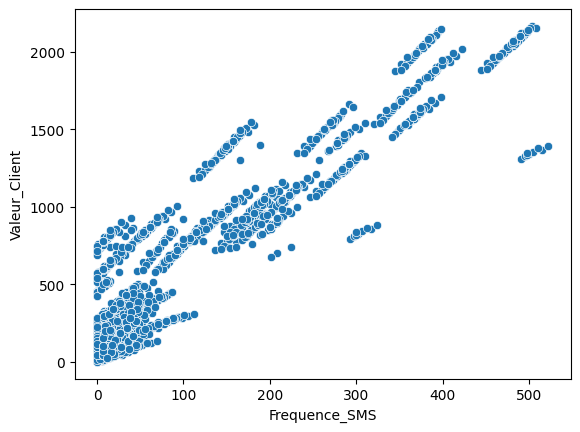

In [8]:
# Le même Graphique ci-dessus mais avec Seaborn
import seaborn as sns
sns.scatterplot(data= df, x= "Frequence_SMS", y = "Valeur_Client")

In [9]:
# en observant les graphiques on soupconne une relation (lineaire) c'est le visuel, il faut ci-dessous quantifier
# cette relation avec une valeur numérique

## Etape 2: CALCUL DES CORRELATIONS

In [10]:
# Etape 2: CALCUL DES CORRELATIONS
#Correlation de Pearson
pearson_corr = df["Valeur_Client"].corr(df["Frequence_SMS"], method='pearson')
pearson_corr

0.9248774260038422

In [11]:
# Correlation de Spearman
spearman_corr = df["Valeur_Client"].corr(df["Frequence_SMS"], method='spearman')
spearman_corr

0.7795895767906671

In [12]:
# Taux de Kendal
kendall_corr = df["Valeur_Client"].corr(df["Frequence_SMS"], method='kendall')
kendall_corr

0.6249297424932203

In [13]:
# pour avoir les 3 resultats ensemble on utilise print
print(pearson_corr)
print(spearman_corr)
print(kendall_corr)

0.9248774260038422
0.7795895767906671
0.6249297424932203


In [14]:
# en vue des résltats ci-dessus il y a ne correlation (var quanti) forte entre les 2 var quanti
# Mais ce sont des résultats statistiques. Il faut à présent des résultats de test de Pearson, Spearman et Kendall
# pour confirmer nos soupcons

## Etape 3: LES PROBALITÉS par des TESTS STATISTIQUES

In [15]:
# Etape 3: obtenir LES PROBALITÉS par des TESTS STATISTIQUES
# pour faire les test de pearson, spearman et Kendall on a besoin du package stats de la library scipy de python
# test de pearson
from scipy import stats
p = stats.pearsonr(df["Valeur_Client"], df["Frequence_SMS"])
p

PearsonRResult(statistic=0.9248774260038425, pvalue=0.0)

In [16]:
# test de spearman
from scipy import stats
p = stats.spearmanr(df["Valeur_Client"], df["Frequence_SMS"])
p

SignificanceResult(statistic=0.7795895767906671, pvalue=0.0)

In [17]:
# test de kendall
from scipy import stats
p = stats.kendalltau(df["Valeur_Client"], df["Frequence_SMS"])
p

SignificanceResult(statistic=0.6249297424932203, pvalue=0.0)

In [18]:
# Notez que quand la p valeur faible on ne peut pas accepter l'hypothèse null qui stipule ds ce cas qu'il pas
# de relation, de correlation entre les 2 var quanti

## Etape 4: MATRICE DE CORRELATION

###  a - Selectionner les Colonnes avec Variables Quantitatives

In [19]:
# Etape 4: MATRICE DE CORRELATION (permet de calculer les valeurs 2 à 2 pour toutes les var quanti)
# - Selectionner uniquement les colonnes quantitatives
quantitative_variable = df.select_dtypes(include=["number"])
quantitative_variable

,ID,Call__Failure,Subscription__Length,Charge__Amount,Secondes_Utilisation,Frequence_Utilisation,Frequence_SMS,Numeros_Appeles_Distincts,Age,Valeur_Client
0,1,8,38,0,4370,71,5,17,30,197.640
1,2,0,39,0,318,5,7,4,25,46.035
2,3,10,37,0,2453,60,359,24,30,1536.520
3,4,10,38,0,4198,66,1,35,15,240.020
4,5,3,38,0,2393,58,2,33,15,145.805
...,...,...,...,...,...,...,...,...,...,...
3145,3146,21,19,2,6697,147,92,44,25,721.980
3146,3147,17,17,1,9237,177,80,42,55,261.210
3147,3148,13,18,4,3157,51,38,21,30,280.320
3148,3149,7,11,2,4695,46,222,12,30,1077.640


### b - Calcule de la HEATMAP DE CORRELATION

In [20]:
# b) - Apres selection des var quanti on calcule la Matrice de correlation avec .corr
quantitative_variable.corr()

,ID,Call__Failure,Subscription__Length,Charge__Amount,Secondes_Utilisation,Frequence_Utilisation,Frequence_SMS,Numeros_Appeles_Distincts,Age,Valeur_Client
ID,1.000000,0.251196,0.074481,0.154998,0.024109,0.035934,0.016782,0.036607,0.093044,0.002673
Call__Failure,0.251196,1.000000,0.169737,0.589028,0.501607,0.573349,-0.022282,0.504058,0.041758,0.121225
Subscription__Length,0.074481,0.169737,1.000000,0.078789,0.124618,0.106534,0.076318,0.092009,-0.002430,0.109565
Charge__Amount,0.154998,0.589028,0.078789,1.000000,0.446738,0.379096,0.091533,0.415198,0.278955,0.169428
Secondes_Utilisation,0.024109,0.501607,0.124618,0.446738,1.000000,0.946489,0.102123,0.676536,0.020843,0.415087
Frequence_Utilisation,0.035934,0.573349,0.106534,0.379096,0.946489,1.000000,0.100019,0.736114,-0.028350,0.401572
Frequence_SMS,0.016782,-0.022282,0.076318,0.091533,0.102123,0.100019,1.000000,0.079650,-0.092798,0.924877
Numeros_Appeles_Distincts,0.036607,0.504058,0.092009,0.415198,0.676536,0.736114,0.079650,1.000000,0.051037,0.284807
Age,0.093044,0.041758,-0.002430,0.278955,0.020843,-0.028350,-0.092798,0.051037,1.000000,-0.220362
Valeur_Client,0.002673,0.121225,0.109565,0.169428,0.415087,0.401572,0.924877,0.284807,-0.220362,1.000000


### c - HEATMAP DE CORRELATION

In [21]:
# Matrice de correlation
# renommer la quantitative_variable.corr() en correlation_matrix, titre pls parlant
correlation_matrix = quantitative_variable.corr()

<Axes: >

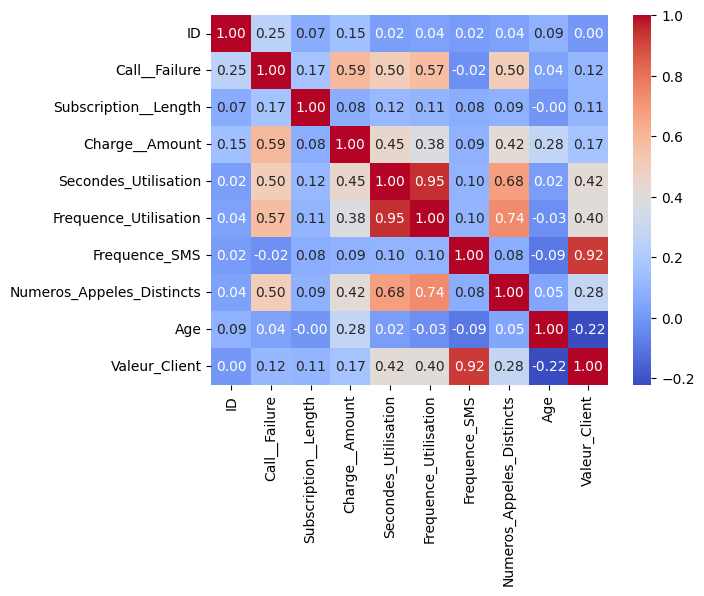

In [22]:
# c) - Heatmap de correlation à l'aide de Seaborn
# créer une Heatmap pour visualiser la matrice de correlation
import seaborn as sns
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt =".2f")
# annot = True annotation pour afficher les chiffres (valeur de correlation)
# cmap = color map ici "coolwarm" changer la couleur voulue (froid au chaud)
# fmt = ".2f"(f est float) pour formater le chiffre par exple 2 chiffres après la virgule
# 1 en diagonale indique qe chaque var quanti est parfaitement (100%) avecsoi-même

In [23]:
# en observant notre Heatmap on voit des exples de var quanti très corrolées entre elles:
# Frequence_Utilisation et Secondes_Utlisation avec 0.95
# Numeros_Appeles_Distincts et Frequence_tilisation avec 0.74


# Question 2
# Y a-t-il un lien entre le churn et le dépôt de plaintes ?
Cettte question introduit l'analyse de LIAISON entre 2 var quali

II - ANALYSE DE LA *LIAISON* ENTRE 2 VARIABLES QUALITATIVES


In [24]:
# Analyse graphique
# Creation de BARPLOT pour montrer la distribution de churn pour chaque ctegorie de plaintes
# revoir rapidement la nature des var (churn, plaintes) dans la question avec dtypes
df.dtypes

ID                             int64
Call__Failure                  int64
Plaintes                      object
Subscription__Length           int64
Charge__Amount                 int64
Secondes_Utilisation           int64
Frequence_Utilisation          int64
Frequence_SMS                  int64
Numeros_Appeles_Distincts      int64
Groupe_Age                    object
Plan_Tarifaire                object
Statut                        object
Age                            int64
Valeur_Client                float64
Churn                         object
dtype: object

In [25]:
# les 2 var churn et plaintes sont des "object" cad des chaines de carateres (str): ce sont des var quali
# il faut d'abord une Analyse graphique (Countplot) ensuite faire des Tests Statistiques

- Etape 1 - Analyse Graphique

Text(0, 0.5, 'Nombre de clients qui churn')

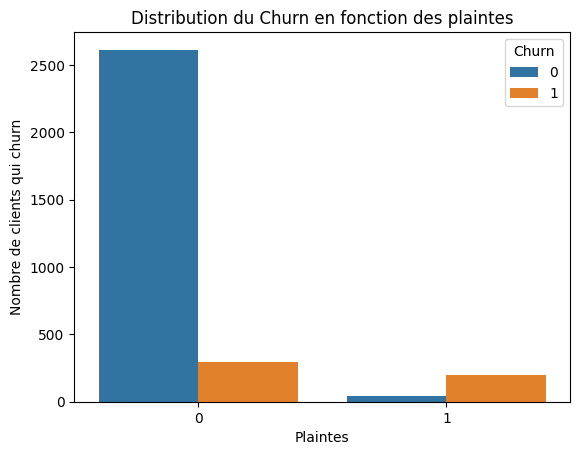

In [31]:
# avec Seaborn et l'option hue permet d'analyser la var Plaintes en fonction du churn
import seaborn as sns
sns.countplot(data = df, x = "Plaintes", hue = "Churn")
plt.title("Distribution du Churn en fonction des plaintes")
plt.xlabel("Plaintes")
plt.ylabel("Nombre de clients qui churn")

In [27]:
# vue le graphique il semble y avoir une liaison entre lenombre de plaintes et le nombre de depart à la concurrence
# il faudra confirmer ce soupcon avec les Tests Statis (ici Ki-2 d'independence, car 2 var quali) à l'aide Scipy
# Notez dès qu'il s'agit de Test Statis il faut tjrs Scipy

In [28]:
# Test de Chi-deux pour valider les observations en 2 Etapes a et b
# importer des packages
from scipy.stats import chi2_contingency

Etape a : Tableau de Contingence

In [29]:
# Tableau de Contingence le crosstable (crosstab) de Pandas
tableau_contingence = pd.crosstab(df["Plaintes"], df["Churn"])
tableau_contingence

Churn,0,1
Plaintes,,
0,2614,295
1,41,200


In [30]:
# le tableau de contingence affiche leseffectif par categorie
# interpretation du tableau: 0 plaintes 2614 n'ont pas churner déjà avec 1 Plainte 41 n'on pas churner
# par contre 200 sont partis à la concurrence

Etape b - Test statistique

In [33]:
# test satatistique
test = chi2_contingency(tableau_contingence)
test

Chi2ContingencyResult(statistic=886.2116236265656, pvalue=9.75604260522434e-195, dof=1, expected_freq=array([[2451.87142857,  457.12857143],
       [ 203.12857143,   37.87142857]]))

In [ ]:
# vue les resultats du test surtout pvalue très faible confirme bien qu'il y a une LIAISON entre les 2 var  quali
# et qu'on ne peut pas accepter l'hypothèse Null (qui dit n'y a pasde liaison), hypothèse alternative est valide
# Pour avoir l'intensité de la liaison on calcule le V de Cramer

Etape b - Calcul du V de Cramer

In [34]:
# il nous faut importer scipy et utiliser la fonction
from scipy.stats.contingency import association
association(tableau_contingence, method = "cramer")


0.5320529624895493

In [ ]:
# la relation est très forte-  V de cramer plus tend vers 50% plus la relation est forte.C#est un signal d'alarme
# que ces clients vont partir à la concurrence

Etape b (bis) - le T deTschuprow
- Quand les variables n'ont pas le même nombre de modalités

In [36]:
# T de Tschuprow (c'est un peu comme un cramer amelioré), le calcul donnera la même valeur
from scipy.stats.contingency import association
association(tableau_contingence, method = "tschuprow")

0.5320529624895493

# Question 3
# Y a-t- un lien entre le Churn et la Valeur Client?
- ceci introduit la notion d'analyse d'une var quali et une var quali

Etape 1 Analyse Graphique

 - ### Analyse graphique avec Seaborn

<Axes: xlabel='Churn', ylabel='Valeur_Client'>

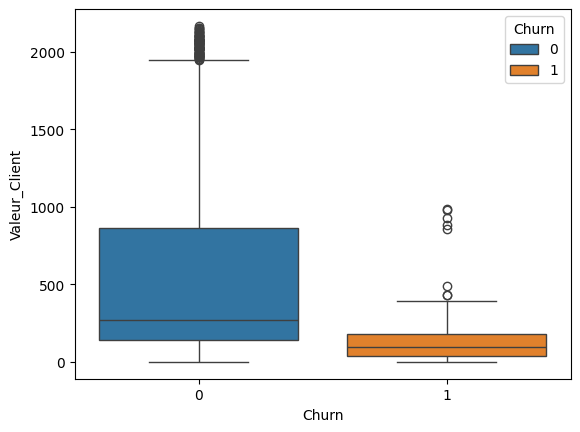

In [39]:
# Analyse graphique
# il faudra mettre en place un BoxPlot de Seaborn avec en x la var quali et en y la var quanti
import seaborn as sns
sns.boxplot(x = "Churn", y= "Valeur_Client", data = df, hue ="Churn")


In [ ]:
# avec l'ajout de hue on a changé la couleur en fonction des categories des var

- ### Analyse graphique avec Plotly
 avantage de l'affichage des valeurs sur le graphique selon la position du curseur

In [44]:
# Analyse graphique avec Plotly Express
import plotly.express as px
# supposons que df est otre Dataframe

# creation du Boplot avec Plotly Expess
fig = px.box(df, x="Churn", y="Valeur_Client", color="Churn",
             labels={"Churn": "statut de Churn", "Valeur_Client": "Valeur_Client"},
             title="Distribution de la Valeur Client par statut de Churn")

# Afficher le Graphique
fig.show()

In [45]:
# sur le plan visuel on constate que en bleu les clients qui n'ont pas churné ont une Valeur Client plus élevée
# que les client en orange qui ont churné, on peut dire aussi qu'il y a une difference de la moyenne, de la mediane
# sur les 2 fig

Etape 2 - Les Tests Statistiques
  

In [ ]:
# on fera des test parametriques (repose sur des lois: normalité et égalité ds variances) car nous avons 2 modalités et
# independant (donc non apparié)

 - Test de STUDENT

In [51]:
# Test PARAMETRIQUE de STUDENT (dépend de la verification de l'Egalité des variances et la NOrmalité de la distribution)
import scipy.stats as stats

# Construction des deux echantillons independants(Valeur des clients qui n'ont churné et la valeur des clients qui ont churné)
# je divise ma base de données en 2 groupes a et b
# a- ensenble des valeur des client qui ont churné
groupe_churn = df[df["Churn"] == 1]["Valeur_Client"]
groupe_churn


16       40.005
18        0.000
22      117.090
24      383.220
26      157.240
         ...   
3126    197.680
3127    168.075
3128     45.840
3131     63.650
3149    100.680
Name: Valeur_Client, Length: 495, dtype: float64

In [52]:
# b - ensenble des valeur des client qui n'ont pas churné
groupe_client = df[df["Churn"] == 0]["Valeur_Client"]
groupe_client

0        197.640
1         46.035
2       1536.520
3        240.020
4        145.805
          ...   
3144     221.280
3145     721.980
3146     261.210
3147     280.320
3148    1077.640
Name: Valeur_Client, Length: 2655, dtype: float64

In [53]:
# effectuons le Test stati pour les 2 groupes INDEPENDANTS (Les churneurs et les fidèles)
stats.ttest_ind(groupe_churn, groupe_client)

TtestResult(statistic=-16.946905380924687, pvalue=1.0207443643931265e-61, df=3148.0)

In [54]:
# la pvaleur est tres faible, on ne peut pas accepter l'hypothese Null, cela induitque les 2 valeurs sont liées.
# la probalité est trop faible pour que notre observation soit due au hasard
# il y a un lien entre le fait de churner et la Valeur client
# verifions les autres hypotheses Egalité des variance et

Etape 3- Test de L'égalite des variances (Test de LEVENE)

In [55]:
# Verifions l'hypothese de l'egalité des variances
# Effectuer le test de Levene pour verifier l'egalité des variances
stats.levene(groupe_churn, groupe_client)

LeveneResult(statistic=239.04186256275227, pvalue=4.9642216033233806e-52)

In [ ]:
# pvaleurtrop faible pour accepter l'hypothese Nulld'egalité des variances

Etape 4 - Test de la Normalité de la distribution (Test de Shapiro Wilk)

In [57]:
# Test des Shapiro (ce test concerne uniquement le groupe_client, les fidèles clients)
stats.shapiro(groupe_client)

ShapiroResult(statistic=0.8320190906524658, pvalue=0.0)

In [58]:
# la pvaleur est ici aussi faible on conclu que la normalité de la distribution (si les données suivent une loi normale)
# l'hypothese n'est pas acceptée : il y a pas de normalité

In [ ]:
# Les 2 hypothèses n'etant pas vérifiées on ne peut pas faire le Test de STUDENT il nous faut un Test Nomparametrique
# celui de Mann-Whitney U

Etape 5 - Test Non Parametrique de Mann-Whirney U

In [59]:
# Test non parametrique de Mann-Whitney U (sur les 2 groupes)
stats.mannwhitneyu(groupe_churn, groupe_client)

MannwhitneyuResult(statistic=280791.0, pvalue=2.992856770049604e-91)

In [61]:
# la pvaleur est tres faible, hypothese Null non acceptée, implique que les moyennes dans les 2 groupes sont pas les mêmes
# car le Test de student érifie l#EGALITÈ des Moyennes
# est ce que la moyennes des client qui vont churner est la même que pour ceux qui sont fidèles
# Conclusion les moyennes sont differentes dans les 2 groupes independants